# GNCIPL Internship Week 2 Project 1

#### Submitted By: Sahil Adlakha
#### Project Name: Global Inflation Trends Analysis

Domain: Economics

Dataset: global_inflation_data.csv (from Kaggle)

Key Focus Area: Inflation trends, Country Comparisons, Average Inflation Change 

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("global_inflation_data.csv")

print(df.head(10))
print(df.describe())
print(df.shape)


          country_name                                   indicator_name  1980  \
0          Afghanistan  Annual average inflation (consumer prices) rate  13.4   
1              Albania  Annual average inflation (consumer prices) rate   NaN   
2              Algeria  Annual average inflation (consumer prices) rate   9.7   
3              Andorra  Annual average inflation (consumer prices) rate   NaN   
4               Angola  Annual average inflation (consumer prices) rate  46.7   
5  Antigua and Barbuda  Annual average inflation (consumer prices) rate  19.0   
6            Argentina  Annual average inflation (consumer prices) rate   NaN   
7              Armenia  Annual average inflation (consumer prices) rate   NaN   
8                Aruba  Annual average inflation (consumer prices) rate   NaN   
9            Australia  Annual average inflation (consumer prices) rate  10.1   

   1981  1982  1983  1984  1985  1986  1987  ...  2015   2016   2017   2018  \
0  22.2  18.2  15.9  20.4   8

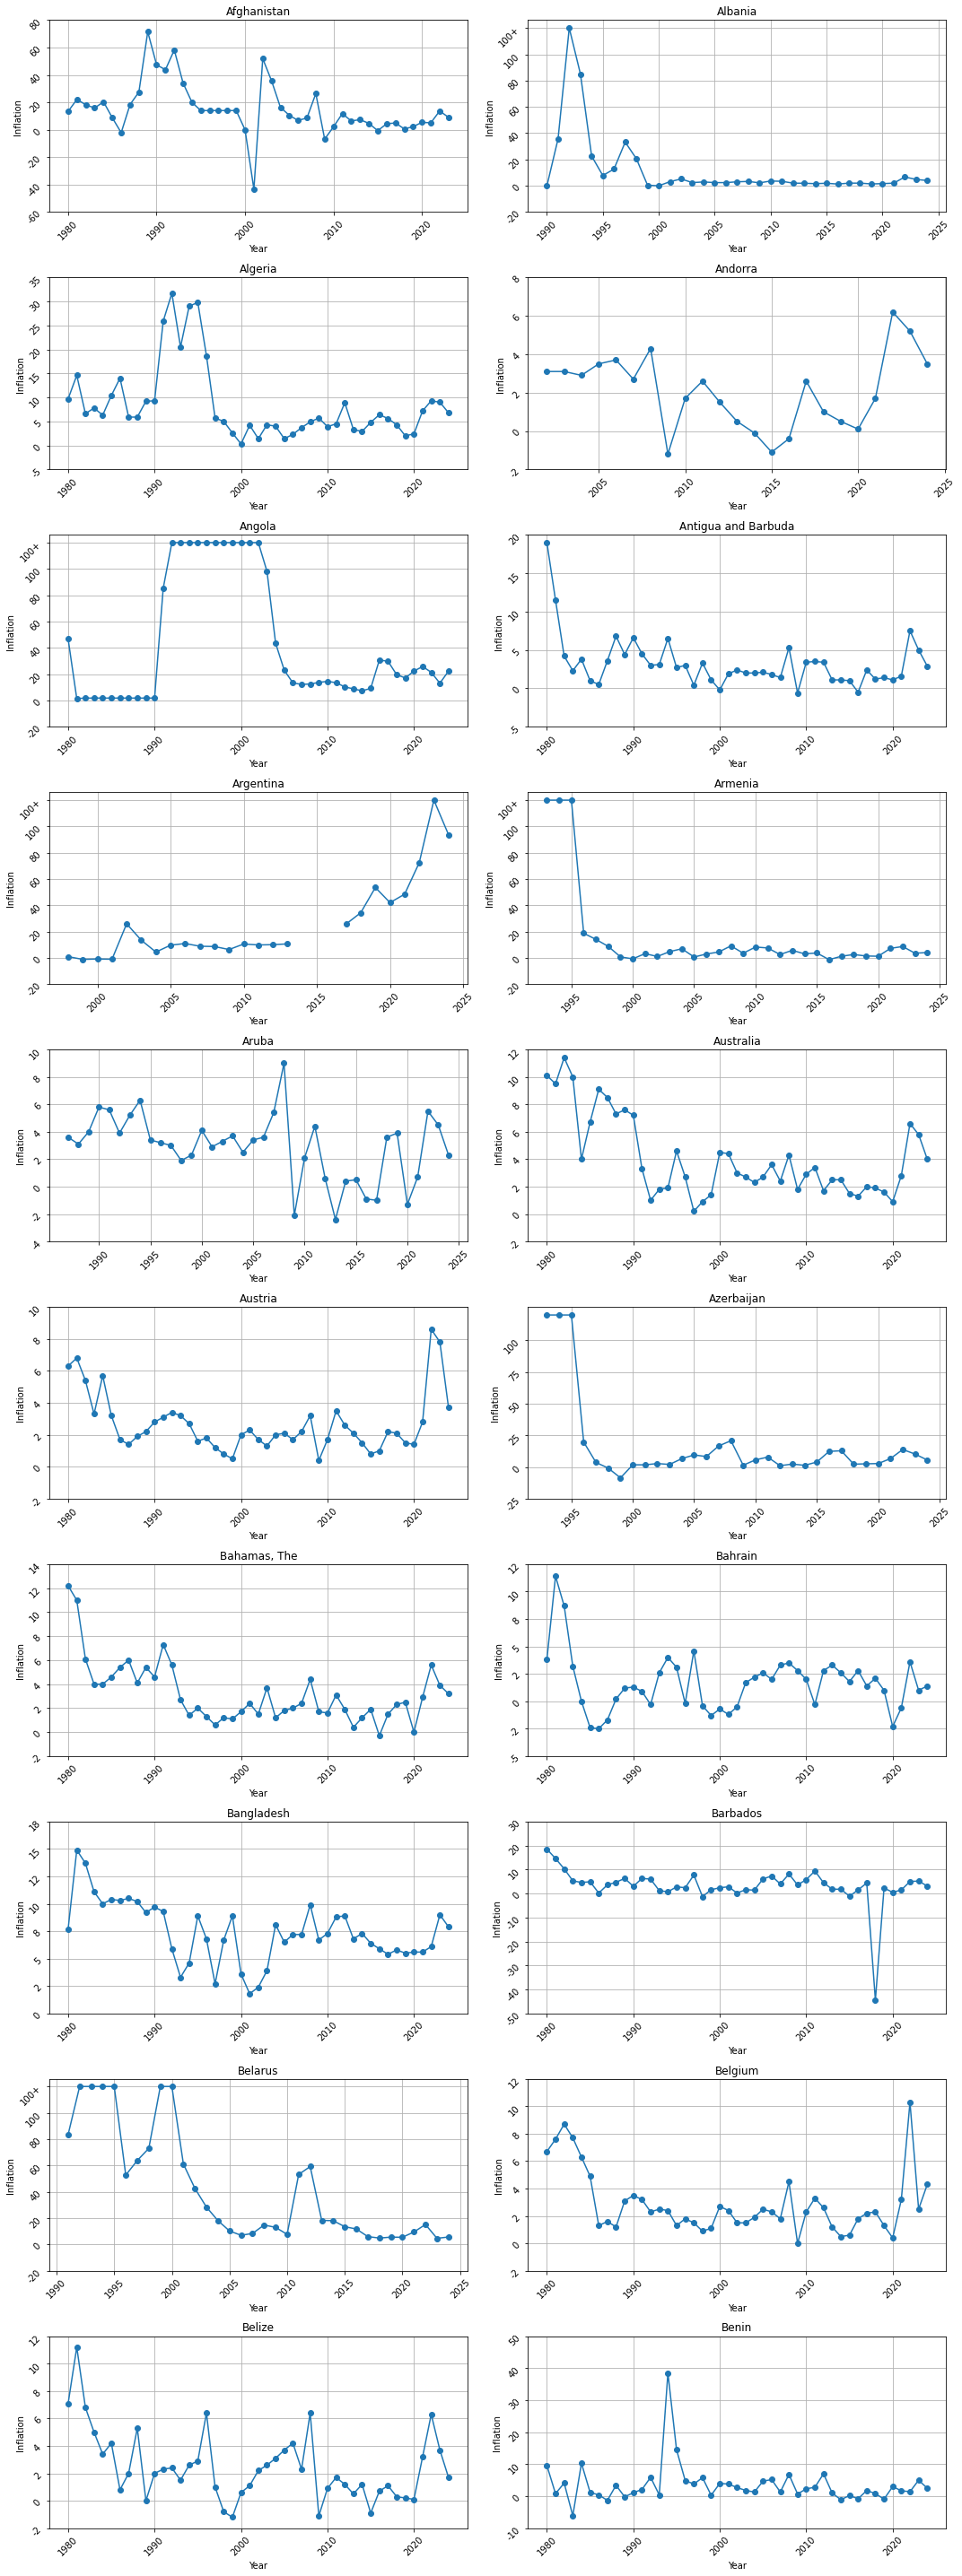

In [24]:
num_countries = 20 #Take top countries accordingly. Let's take 20

# Setup the subplot grid
ncols = 2  # Number of columns in the subplot grid
nrows = int(num_countries / ncols) + (num_countries % ncols > 0)  # Calculate rows needed

fig, axs = plt.subplots(nrows, ncols, figsize=(15, nrows * 4))
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust spacing between plots
    
for i in range(num_countries):
    row = i // ncols
    col = i % ncols
    
    country_data = df.iloc[i, 2:]  # Exclude country_name and indicator columns
    years = country_data.index.astype(int)
        
    # Ensure the data is numeric and replace non-numeric values with NaN
    values = pd.to_numeric(country_data.values, errors='coerce')
    
    # Cap values at 120 for those greater than 100
    modified_values = np.where(values > 100, 120, values)
        
    # Plotting on the respective subplot
    ax = axs[row, col] if nrows > 1 else axs[col] if nrows == 1 else axs
    ax.plot(years, modified_values, marker='o', linestyle='-')
    ax.set_title(df.iloc[i, 0])
    ax.set_xlabel("Year")
    ax.set_ylabel("Inflation")
    ax.grid(True)
    ax.tick_params(labelrotation=45)
        
    # Adjust y-ticks to exclude values beyond the cap
    y_ticks = ax.get_yticks()
    y_ticks = y_ticks[y_ticks <= 120]  # Keep y-ticks up to and including the cap
    y_tick_labels = [f"{y:.0f}" if y < 120 else "100+" for y in y_ticks]
    ax.set_yticks(y_ticks)
    ax.set_yticklabels(y_tick_labels)
    
if num_countries % ncols:
    axs[-1, -1].axis('off')


plt.tight_layout()
plt.show()

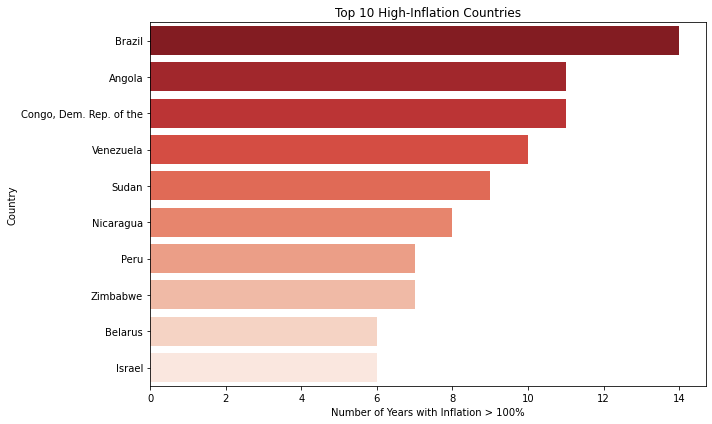

In [25]:
high_inflation_countries = {}  # Dictionary to store results
    
# Exclude non-numeric columns (e.g., country names) from the comparison
numeric_df = df.select_dtypes(include=[np.number])
    
for index, row in numeric_df.iterrows():
    country_name = df.loc[index, 'country_name']  # Get the country name from the original DataFrame
    high_inflation_years = row[row > 100].index.tolist()  # Now, this comparison is safe
        
    if high_inflation_years:
        high_inflation_countries[country_name] = high_inflation_years

n = min(len(high_inflation_countries), 10)

# Top n countries with most years of inflation > 100%
top_n_inflation = dict(sorted(
    {country: len(years) for country, years in high_inflation_countries.items()}.items(),
    key=lambda x: x[1],
    reverse=True
)[:n])

# Convert to DataFrame
top_df = pd.DataFrame(top_n_inflation.items(), columns=['Country', 'High Inflation Years'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_df, y='Country', x='High Inflation Years', palette='Reds_r')
plt.title("Top 10 High-Inflation Countries")
plt.xlabel("Number of Years with Inflation > 100%")
plt.ylabel("Country")
plt.tight_layout()
plt.show()



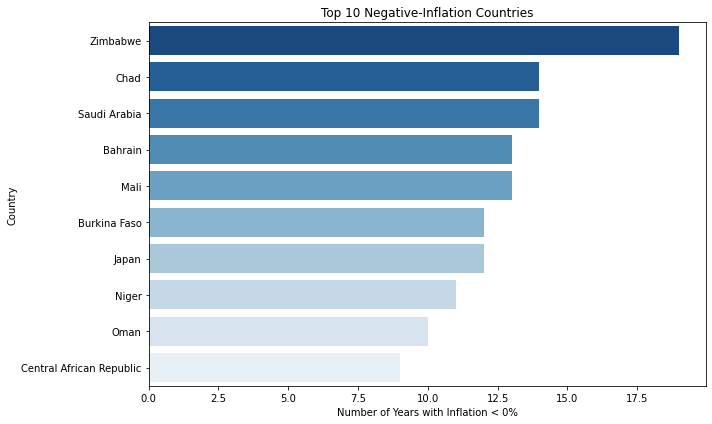

In [26]:
negative_inflation_countries = {}  # Dictionary to store results
    
# Exclude non-numeric columns (e.g., country names) from the comparison
numeric_df = df.select_dtypes(include=[np.number])
    
for index, row in numeric_df.iterrows():
    country_name = df.loc[index, 'country_name']  # Get the country name from the original DataFrame
    high_inflation_years = row[row < 0].index.tolist()  # Now, this comparison is safe
        
    if high_inflation_years:
        # Assuming years are direct column names, adjust if needed
        negative_inflation_countries[country_name] = high_inflation_years
        
n = min(len(negative_inflation_countries), 10)
        
# Top n countries with most years of inflation < 0%
top_n_inflation = dict(sorted(
    {country: len(years) for country, years in negative_inflation_countries.items()}.items(),
    key=lambda x: x[1],
    reverse=True
)[:n])

# Convert to DataFrame
top_df = pd.DataFrame(top_n_inflation.items(), columns=['Country', 'High Inflation Years'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_df, y='Country', x='High Inflation Years', palette='Blues_r')
plt.title("Top 10 Negative-Inflation Countries")
plt.xlabel("Number of Years with Inflation < 0%")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


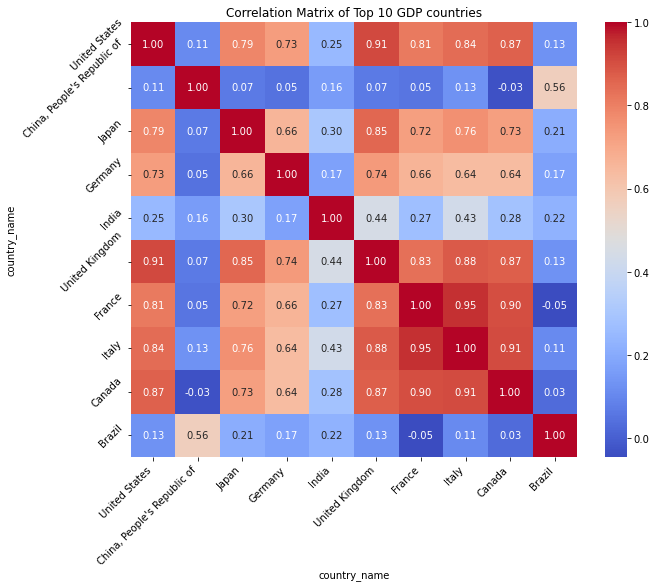

In [27]:
df_copy = df.copy(deep = True)
df_copy.drop('indicator_name', axis=1, inplace=True)
df_copy.set_index('country_name', inplace=True)
df_transposed = df_copy.T
countries = [
    "United States", "China, People's Republic of", "Japan", "Germany", "India",
    "United Kingdom", "France", "Italy", "Canada", "Brazil"
]
df_filtered = df_transposed[countries]
corr = df_filtered.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.title('Correlation Matrix of Top 10 GDP countries')
plt.show()

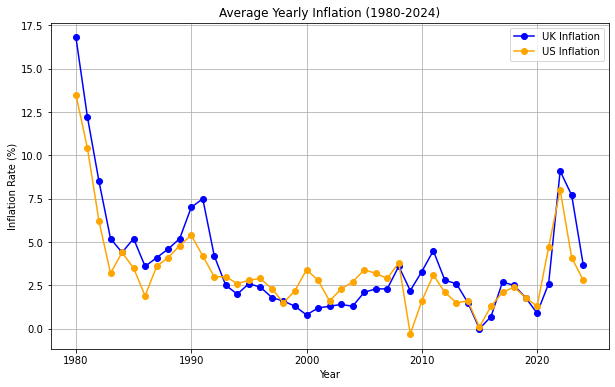

In [28]:
# UK vs US Inflation Change
uk_inf = df[df['country_name'] == 'United Kingdom']
us_inf = df[df['country_name'] == 'United States']

uk_data = uk_inf.drop(columns=['country_name', 'indicator_name'])
us_data = us_inf.drop(columns=['country_name', 'indicator_name'])

# Transpose the dataframe
uk_data = uk_data.transpose().reset_index()
us_data = us_data.transpose().reset_index()

# Rename the columns
uk_data.columns = ['Year', 'Inflation']
us_data.columns = ['Year', 'Inflation']

# Convert the 'Year' column to integer type
uk_data['Year'] = uk_data['Year'].astype(int)
us_data['Year'] = us_data['Year'].astype(int)

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(uk_data['Year'], uk_data['Inflation'], marker='o', color='blue', label='UK Inflation')
plt.plot(us_data['Year'], us_data['Inflation'], marker='o', color='orange', label='US Inflation')
plt.title('Average Yearly Inflation (1980-2024)')
plt.xlabel('Year')
plt.ylabel('Inflation Rate (%)')
plt.legend(loc='best')
plt.grid(True)

plt.show()

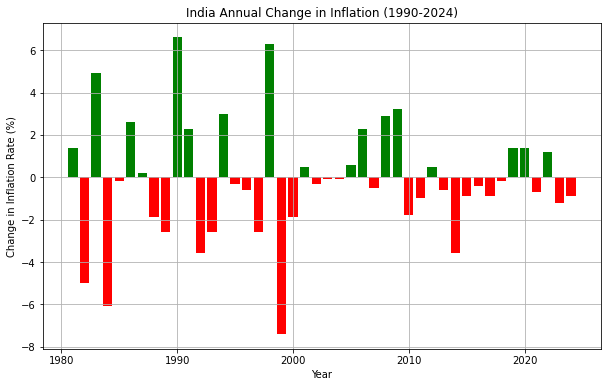

In [29]:
ind_inf = df[df['country_name'] == 'India']

ind_data = ind_inf.drop(columns=['country_name', 'indicator_name'])

# Transpose the dataframe
ind_data = ind_data.transpose().reset_index()

# Rename the columns
ind_data.columns = ['Year', 'Inflation']

#Convert Year to int datatype
ind_data['Year'] = ind_data['Year'].astype(int)

ind_data['Inflation Change'] = ind_data['Inflation'].diff()

# Drop the first row with NaN value
ind_data = ind_data.dropna()

# Determine bar colors based on positive or negative change
colors = ['green' if x > 0 else 'red' for x in ind_data['Inflation Change']]

# Plot the annual change in inflation as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(ind_data['Year'], ind_data['Inflation Change'], color=colors)
plt.title('India Annual Change in Inflation (1990-2024)')
plt.xlabel('Year')
plt.ylabel('Change in Inflation Rate (%)')
plt.grid(True)
plt.show()